<a href="https://colab.research.google.com/github/laredein/NeuralNetworks/blob/master/XORwithoutlibs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выходные данные были обрезаны до нескольких последних строк (5000).
0.12634694992304243
[0.03929725 0.49960309 0.96122982 0.50193834]
0.1263466391929044
[0.03929274 0.49960312 0.96123463 0.50193785]
0.12634632860106798
[0.03928823 0.49960314 0.96123944 0.50193736]
0.1263460181474426
[0.03928372 0.49960317 0.96124425 0.50193687]
0.126345707831938
[0.03927922 0.49960319 0.96124905 0.50193638]
0.12634539765446362
[0.03927471 0.49960321 0.96125386 0.50193589]
0.1263450876149294
[0.03927021 0.49960324 0.96125866 0.5019354 ]
0.1263447777132451
[0.03926571 0.49960326 0.96126346 0.50193492]
0.12634446794932055
[0.03926121 0.49960328 0.96126826 0.50193443]
0.12634415832306578
[0.03925671 0.49960331 0.96127306 0.50193394]
0.1263438488343908
[0.03925221 0.49960333 0.96127785 0.50193345]
0.12634353948320573
[0.03924771 0.49960336 0.96128265 0.50193297]
0.12634323026942085
[0.03924322 0.49960338 0.96128744 0.50193248]
0.12634292119294632
[0.03923873 0.4996034  0.96129223 0.50193199]
0.1263426122536

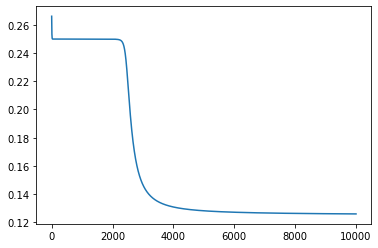

In [4]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
class layer():
    def __init__(self,n):
        self.arr=np.array([1 for _ in range(n)])
        self.n=n
    def __str__(self):
        s=""
        for i in self.arr:
            s=s+str(i)+" "
        return s
    def __len__(self):
        return self.n
    def sigmoid(self):
        self.arr=1/(1+math.e**(-self.arr))



class weights():
    def __init__(self,layer1,layer2):
        self.arr=np.array([[random.random() for _ in range(len(layer2))]for __ in range(len(layer1))])
    def __str__(self):
        s=""
        for i in self.arr:
            for j in i:
                s=s+str(j)+" "
            s=s+"\n"
        return s
    def __mul__(self,other):
        return self.arr.dot(other.arr)
class neuralnetwork():
    def __init__(self,inputlayer,outputlayer):
        self.network=[inputlayer,outputlayer]
        self.weights=[weights(inputlayer,outputlayer)]
        self.outputlayer=outputlayer
        self.draw=[]
        self.n=1
    def append(self,newlayer):
        self.network[self.n]=newlayer
        self.network.append(self.outputlayer)

        self.weights[self.n-1]=weights(self.network[self.n-1],newlayer)
        self.weights.append(weights(newlayer,self.outputlayer))
        self.n=self.n+1
    def __str__(self):
        s="weights"+"\n"
        for i in self.weights:
            s=s+str(i)+"\n"
        s=s+"layer sizes"+"\n"
        for i in self.network:
            s=s+str(len(i))+" "
        return s
    def predict(self,inparr,out):
        outputset=np.array([])
        for input in inparr:
            for i in range(len(input)):
                self.network[0].arr[i]=input[i]
            for j in range(1,self.n+1):
                self.network[j].arr=np.array(self.network[j-1].arr.dot(self.weights[j-1].arr))
                self.network[j].sigmoid()
            outputset=np.append(outputset,self.network[self.n].arr)
        print(outputset)
        print(((outputset-out)**2).sum()/len(out))
        return ((outputset-out)**2).sum()/len(out)
    def backprop(self,inparr,outarr):
        for inpnumb in range(len(outarr)):
            for i in range(len(inparr[inpnumb])):
                self.network[0].arr[i]=inparr[inpnumb][i]
            for j in range(1,self.n+1):
                self.network[j].arr=np.array(self.network[j-1].arr.dot(self.weights[j-1].arr))
                self.network[j].sigmoid()
            o=self.network[self.n].arr

            deltas=[]
            deltas.append((outarr[inpnumb]-o)*(1-o)*o)
            for i in range(self.n-1,0,-1):
                deltalayer=[]
                for k in range(len(self.network[i])):
                    c=(1-self.network[i].arr[k])*self.network[i].arr[k]
                    s=0
                    for j in range(len(self.weights[i].arr[k])):
                        s=s+self.weights[i].arr[k][j]*deltas[len(deltas)-1][j]
                    c=c*s
                    deltalayer.append(c)
                deltas.append(deltalayer)
            deltas.reverse()
            for i in range(len(self.weights)):
                for j in range(len(self.weights[i].arr)):
                    for k in range(len(self.weights[i].arr[j])):
                        self.weights[i].arr[j][k]=self.weights[i].arr[j][k]+0.5*deltas[i][k]*self.network[i].arr[j]
        self.draw.append(self.predict(inp,out))
        return self.draw
inp=np.array([[0,0],[0,1],[1,0],[1,1]])
out=np.array([0,1,1,0])

a=layer(2)
b=layer(1)
c=layer(2)
nn=neuralnetwork(a,b)
nn.append(c)



for i in range(10000):
    nn.backprop(inp,out)

nn.predict(inp,out)
x=np.arange(len(nn.draw))
plt.plot(x,nn.draw)
plt.show()